## Visualization 1
In the cells below, I take a data set that I thoroughly clenaed from an Amazon dataset provided to me by a professor at UCSD. The data from from the original raw files I received were connected based on matching asin numbers through SQL. From there, I continued to preform data wrangling to delete NaN's, ensure adequate data for calculations, create country-origin rows, take only unique brand instances, create development level rows and so forth. Once the data were thoroughly cleaned, I saved the new pandas dataframe as a CSV file which is imported here for the following visualizations.

In [1]:
#Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read in the cleaned data from my previous work 
fullData_toRead = 'Electronics Data/fullData_electronics_develop.csv'
fullData = pd.read_csv(fullData_toRead)

In [3]:
# Take random sample of 5 data points
# I have connected reviews and products based on asin and created/cleaned columns
fullData.sample(5)

,asin,overall,unixReviewTime,reviewTime,price,brand,category,country_origin,developed
273752,B0031RG29M,5,1307404800,"06 7, 2011",5.75,Lexar,electronics,usa,1
233379,B001O5CCQK,3,1261180800,"12 19, 2009",95.00,Logitech,electronics,swiss,1
262811,B002TFFHFM,4,1264982400,"02 1, 2010",23.95,Tamrac,electronics,usa,1
59724,B00000J1EQ,5,1389312000,"01 10, 2014",13.62,Maxell,electronics,usa,1
281056,B0018QNYSK,4,1376697600,"08 17, 2013",105.79,Polk Audio,electronics,usa,1


In [4]:
# create grouped by data 
p = fullData.groupby(['country_origin']).mean()
a = fullData.groupby(['country_origin']).count()

In [5]:
p['country'] = p.index.values
p['count'] =a['asin'].values

In [6]:
p2 = fullData.groupby(['brand']).mean()
c2 = fullData.groupby(['brand']).count()
a2 = fullData.groupby(['brand']).first()
p2['brand'] = p2.index.values
p2['country'] = a2['country_origin']
p2['count'] = c2['asin']

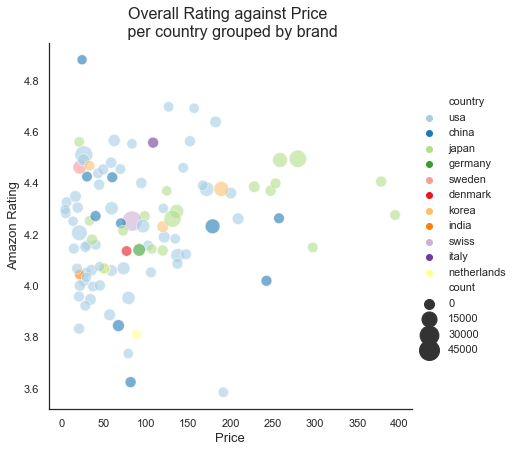

In [19]:
# create a scatterplot using seaborn
# groups data by brand, sets weight by count
sns.set(style="white")
sns.relplot(x="price", y="overall", hue = 'country', size='count',
            sizes=(100, 400), alpha=.6, palette="Paired",
            height=6, data= p2)
plt.title('Overall Rating against Price \n per country grouped by brand', fontsize=16)
plt.xlabel('Price', fontsize=13)
plt.ylabel('Amazon Rating', fontsize=13)
plt.figure(figsize=(8,5))

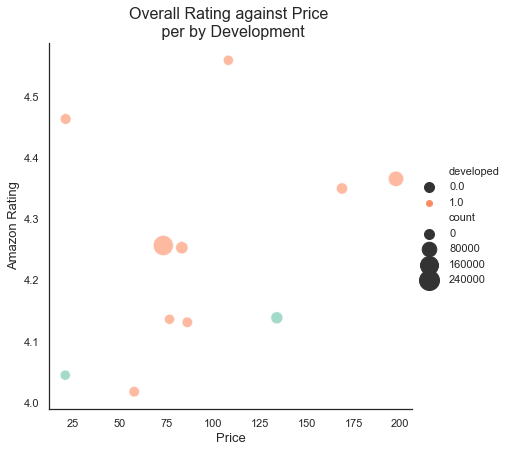

In [30]:
# create a scatterplot using seaborn
# groups data by development, sets weight by count

sns.set(style="white")
sns.relplot(x="price", y="overall", hue = 'developed',size ='count',
            sizes=(100, 400), alpha=.6, palette="Set2",
            height=6, data=p)
plt.title('Overall Rating against Price \n per by Development', fontsize=16)
plt.xlabel('Price', fontsize=13)
plt.ylabel('Amazon Rating', fontsize=13)
plt.figure(figsize=(8,5))

For the scatter shown above, it is evident that, as hypothesized there does not seem to be any specific linear trends concerning country-of-origin and ratings on Amazon. Contrary to widely accepted beliefs in academia, which focuses predominantly on traditional brick-and-mortar retail, these visualizations suggest that country information is not a salient cue for consumers in an online marketplace. Further evidence for this is demonstrated in the scatterplot with development levels; it appears as though brands, regardless of whether they come from a developed country or not, are not significantly impacted by brand familiarity. Again, this is contrary to the conventional wisdom in academia. These visuals indicate that brand information is a less salient cue on Amazon than in physical stores. This suggests that consumers may be more willing to give less well-known competitors a chance on Amazon as compared to real life. Further, I have run an OLS model and PCA on this data set (along with a few other Amazon datasets across various product categories) and I found that price appears to be the predominantly important factor for consumers on Amazon. This suggests that companies should be careful of losing control over their pricing on Amazon (as Amazon often takes over advertising/pricing of their partners) rather than the brand name itself.

The results suggest of my project (ANOVA not shown in this notebook, but visualizations support the findings) suggests that there was a significant difference between average overall ratings for developed nation brands versus developing nation brands as determined by a one-way ANOVA (F(1, 369175) = 465.99, p = 2.76e-103, ηp2 = 0.00126). However, given the magnitude of the data (i.e., 369,177 distinct data points) and the small p-value, an effect size analysis was performed to validate that the country-of-origin effect was not simply due to the size of the data, which naturally amplifies even miniscule differences between two groups. As such, the data were further subject to a partial eta-squared analysis to calculate the effect size of the data. The result of the partial eta-squared indicates that, even though the ANOVA suggests the overall ratings from developed and developing brands are statistically significant, the difference is trivial. As anything less than a 0.01 effect size is believed to be a trivial effect, the result of the partial eta-squared (ηp2 = 0.00126) suggests the quantity of data augmented inconsequential differences between the means. 

© Kathy Tian